# 4F13 - CW3 Code
Use a Jupyter Notebook as it takes so long

In [35]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']

## a - ML Multinomial

In [36]:
from tqdm import tqdm


W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(A[:, 0])  # number of documents in A

# Initialization: assign each document a mixture component at random
word_counts = np.zeros(W)  # counts of each word

# Populate the count matrices by looping over documents
for doc in tqdm(range(D)):
    doc_indices = np.where(A[:, 0] == doc+1)  # get all occurrences of document d in the training data
    word_ids = np.array(A[doc_indices, 1])  # unique word id's in document d
    counts = np.array(A[doc_indices, 2])  # counts of words in document d
    word_counts[word_ids-1] += counts  # number of times w is assigned to component k
print("complete")

num_words = np.sum(word_counts).astype(int)
word_frequencies = np.true_divide(word_counts, num_words)

print("W={} distinct words".format(W))
print("N={} total words".format(num_words))

100%|██████████| 2000/2000 [00:00<00:00, 13954.41it/s]

complete
W=6906 distinct words
N=271898 total words


[0.0140972  0.00967642 0.00841124 0.00570067 0.00535863 0.00534392
 0.00498716 0.00497245 0.00468558 0.00450537 0.00432883 0.00401989
 0.00388749 0.00384335 0.00353441 0.00352706 0.00344615 0.00343143
 0.00342776 0.00340937]


Text(0, 0.5, 'Word')

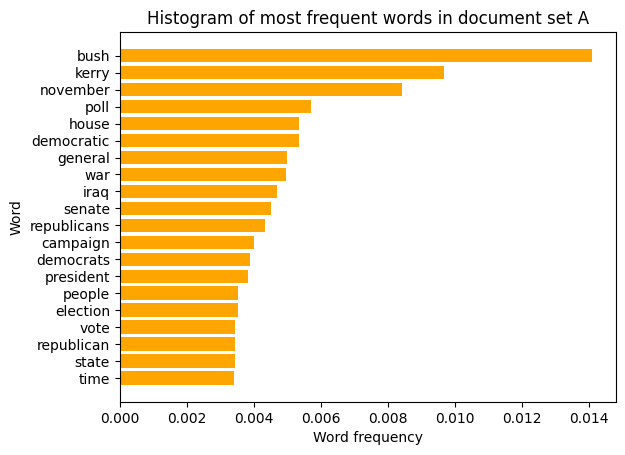

In [37]:
import matplotlib.pyplot as plt


cutoff = 20
top_word_indices = np.argsort(word_frequencies)[::-1][:cutoff]
top_frequencies = word_frequencies[top_word_indices]
top_words = [word[0] for word in V[top_word_indices, 0]]

print(top_frequencies)

plt.barh(top_words[::-1], top_frequencies[::-1], color='orange')
plt.title("Histogram of most frequent words in document set A")
plt.xlabel("Word frequency")
plt.ylabel("Word")

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.67784978e-06 3.67784978e-06
 3.67784978e-06 3.67784978e-06 3.67784978e-06 3.67784978e-06]


Text(0, 0.5, 'Word')

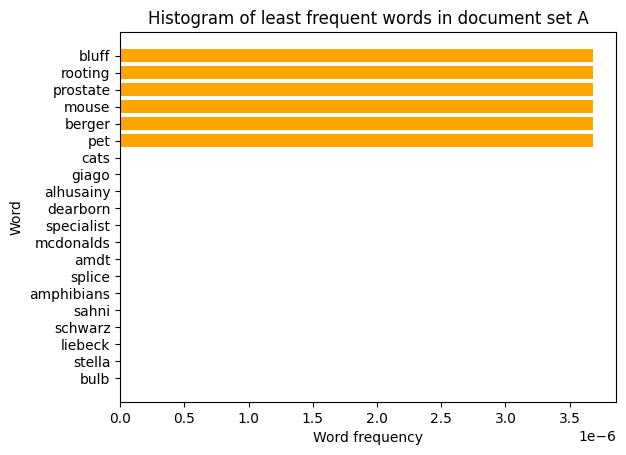

In [38]:
cutoff = 20
bottom_word_indices = np.argsort(word_frequencies)[:cutoff]
bottom_frequencies = word_frequencies[bottom_word_indices]
bottom_words = [word[0] for word in V[bottom_word_indices, 0]]

print(bottom_frequencies)

plt.barh(bottom_words, bottom_frequencies, color='orange')
plt.title("Histogram of least frequent words in document set A")
plt.xlabel("Word frequency")
plt.ylabel("Word")

## b - Bayesian Inference (Dirichlet)

In [39]:
a = 0.1
prior_counts = a * np.ones(W)

posterior_counts = word_counts + prior_counts
total_count = np.sum(posterior_counts)

posterior_freqs = np.true_divide(posterior_counts, total_count)

[0.01406185 0.00965227 0.0083903  0.00568659 0.00534542 0.00533074
 0.0049749  0.00496022 0.00467408 0.00449432 0.00431823 0.00401007
 0.00387801 0.00383398 0.00352583 0.00351849 0.00343778 0.00342311
 0.00341944 0.0034011 ]


Text(0, 0.5, 'Word')

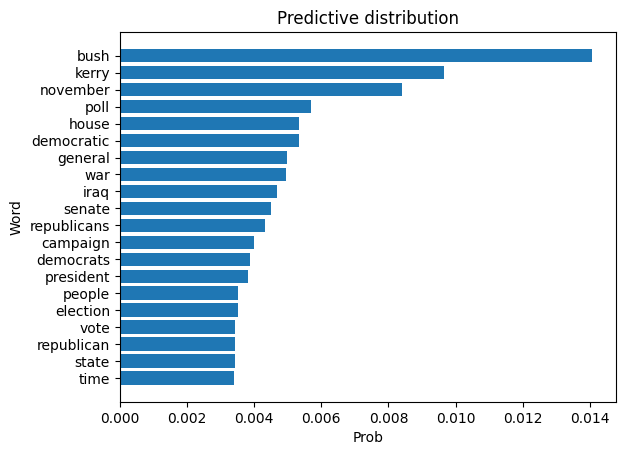

In [40]:
cutoff = 20
top_word_indices = np.argsort(posterior_freqs)[::-1][:cutoff]
top_frequencies = posterior_freqs[top_word_indices]
top_words = [word[0] for word in V[top_word_indices, 0]]

print(top_frequencies)

plt.barh(top_words[::-1], top_frequencies[::-1])
plt.title("Predictive distribution")
plt.xlabel("Prob")
plt.ylabel("Word")

## c - Test document probability

In [41]:
doc_id = 2001
doc_indices = np.where(B[:, 0] == doc_id)  # get all occurrences of document d in the training data

doc_word_counts = np.zeros(W)

word_ids = np.array(B[doc_indices, 1])  # unique word id's in document d
counts = np.array(B[doc_indices, 2])  # counts of words in document d
doc_word_counts[word_ids-1] += counts  # marry correct ordering

n = np.sum(doc_word_counts).astype(int)

log_post_freqs = np.log(posterior_freqs)
log_prob = np.dot(doc_word_counts, log_post_freqs)

perplexity = np.exp(- log_prob / n)

print("Document {} has log probability: l={}".format(doc_id, log_prob))
print("Total n={} words in doc".format(n))
print("Perplexity p={}".format(perplexity))


Document 2001 has log probability: l=-3691.216789206269
Total n=440 words in doc
Perplexity p=4398.984801609545


In [42]:
b_docs = np.max(B[:, 0])  # number of documents in A

# Initialization: assign each document a mixture component at random
b_word_counts = np.zeros(W)  # counts of each word

# Populate the count matrices by looping over documents
for doc in tqdm(range(b_docs)):
    doc_indices = np.where(B[:, 0] == doc+1)  # get all occurrences of document d in the training data
    word_ids = np.array(B[doc_indices, 1])  # unique word id's in document d
    counts = np.array(B[doc_indices, 2])  # counts of words in document d
    b_word_counts[word_ids-1] += counts  # number of times w is assigned to component k
print("complete")

b_num_words = np.sum(b_word_counts).astype(int)
b_word_frequencies = np.true_divide(b_word_counts, num_words)

print("W={} distinct words".format(W))
print("N={} total words".format(b_num_words))

log_prob_b = np.dot(b_word_counts, log_post_freqs)
perplexity_b = np.exp( - log_prob_b / b_num_words)

print("Perplexity p={}".format(perplexity_b))

100%|██████████| 3430/3430 [00:00<00:00, 22885.68it/s]

complete
W=6906 distinct words
N=195816 total words
Perplexity p=2697.1068182222198


[0.0108423  0.00753224 0.00549471 0.00409345 0.00400886 0.00372198
 0.0036521  0.00346821 0.00340937 0.00330639 0.00329535 0.0029717
 0.0028393  0.0028062  0.00275103 0.00262231 0.00253036 0.00252668
 0.00249726 0.00245313]


Text(0, 0.5, 'Word')

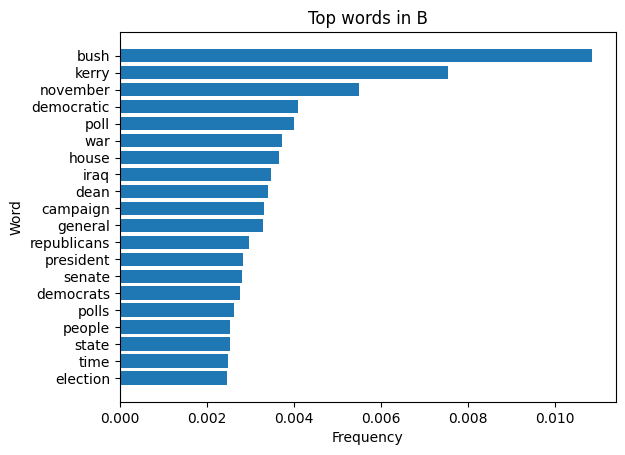

In [43]:
cutoff = 20
top_word_indices = np.argsort(b_word_frequencies)[::-1][:cutoff]
top_frequencies = b_word_frequencies[top_word_indices]
top_words = [word[0] for word in V[top_word_indices, 0]]

print(top_frequencies)

plt.barh(top_words[::-1], top_frequencies[::-1])
plt.title("Top words in B")
plt.xlabel("Frequency")
plt.ylabel("Word")

## d - Bayesian Micture Model: Gibbs Sampling

In [44]:
from bmm import BMM

np.random.seed(3)

gibbs_iters = 50
K = 10  # number of clusters
alpha = 10  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
perplexity, swk, sk_docs_over_time = BMM(A, B, K, alpha, gamma, gibbs_iters)
print("Perplexity: {}".format(perplexity))

Looping through documents to populate count matrices...


100%|██████████| 2000/2000 [00:00<00:00, 15838.83it/s]


Gibbs sampling...


100%|██████████| 50/50 [00:28<00:00,  1.78it/s]


Test Documents...


100%|██████████| 1430/1430 [00:00<00:00, 3245.29it/s]

Perplexity: 2182.414202302087


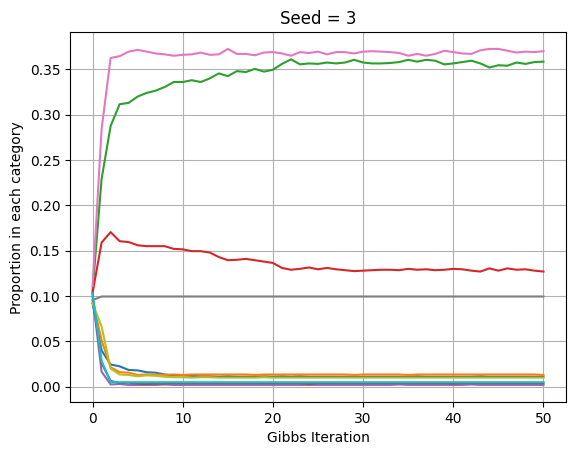

In [45]:
#from labellines import labelLines

points=50
cutoff = 0.05
iters = range(0, points+1)
plt.figure()
D = np.sum(sk_docs_over_time[:, 0])
for k in range(0, K):
    vals = sk_docs_over_time[k, 0:points+1] / D
    mean = np.mean(vals)
    label = str(k+1) if mean > cutoff else ""
    plt.plot(iters, vals, label=label)

plt.grid()
plt.title("Seed = 3")
plt.xlabel("Gibbs Iteration")
plt.ylabel("Proportion in each category")
#labelLines(plt.gca().get_lines())
plt.show()

## e - LDA

In [46]:
from lda import LDA

seed=1
np.random.seed(seed)

K = 20  # number of clusters
alpha = 10  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words

num_iters = 50
perplexity, swk = LDA(A, B, K, alpha, gamma, num_iters)

TypeError: LDA() takes 5 positional arguments but 6 were given

In [ ]:
print(perplexity)

[2072.50868889]


In [ ]:
from lda import gen_posterior

W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(A[:, 0])  # number of documents in A
K = 20
alpha = 10  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
num_gibbs_iters = 50
swk, sk, word_counts_by_id_topic_it, topic_counts_by_id_doc_it = gen_posterior(A, W, D, K, alpha, gamma, num_gibbs_iters)

100%|██████████| 50/50 [2:43:06<00:00, 195.74s/it]


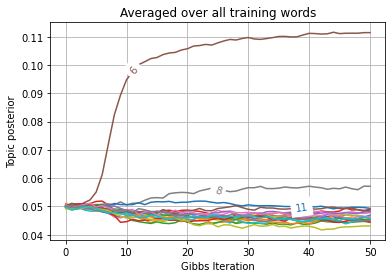

In [ ]:
from labellines import labelLines

points=50
cutoff = 0.05
iters = range(0, points+1)
plt.figure()
N = np.sum(topic_counts_by_id_doc_it[:, :, 0]) + K*alpha
for k in range(0, K):
    vals = np.sum(topic_counts_by_id_doc_it[k, :, 0:points+1], axis=0) + alpha
    vals = vals / N
    mean = np.mean(vals)
    label = str(k+1) if mean > cutoff else ""
    plt.plot(iters, vals, label=label)

plt.grid()
plt.title("Averaged over all training words")
plt.xlabel("Gibbs Iteration")
plt.ylabel("Topic posterior")
labelLines(plt.gca().get_lines())
plt.show()

In [ ]:
points=50
cutoff = 0.06
iters = range(0, points+1)
plt.figure()
d=0
N = np.sum(topic_counts_by_id_doc_it[:, d, 0]) + K*alpha
for k in range(0, K):
    vals = topic_counts_by_id_doc_it[k, d, 0:points+1]+ alpha
    vals = vals / N
    mean = np.mean(vals)
    label = str(k+1) if mean > cutoff else ""
    plt.plot(iters, vals, label=label)

plt.grid()
plt.title("Document {}".format(d+1))
plt.xlabel("Gibbs Iteration")
plt.ylabel("Topic posterior")
labelLines(plt.gca().get_lines())
plt.show()

NameError: name 'topic_counts_by_id_doc_it' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
from lda import test_perplexity

perplexity = test_perplexity(B, W, D, K, swk, sk, alpha, gamma, 50)
print(perplexity)


100%|██████████| 1430/1430 [13:03<00:00,  1.82it/s][2064.77536895]



In [ ]:
swk_per_it = word_counts_by_id_topic_it
sk_per_it = np.sum(topic_counts_by_id_doc_it, axis=1)


[2096.78586308]


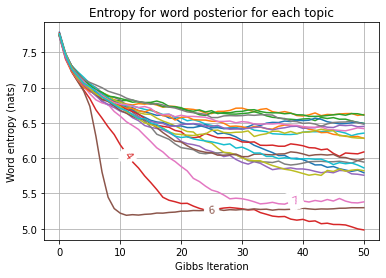

In [ ]:
def compute_entropy(vector):
    scale = np.sum(vector)
    normalised = vector / scale
    return - np.dot(normalised, np.log(normalised))

topic_entropies = np.zeros((K, num_gibbs_iters+1))
for k in range(0, K):
    for it in range(0, num_gibbs_iters + 1):
        entropy = compute_entropy(word_counts_by_id_topic_it[:, k, it] + gamma)
        topic_entropies[k, it] = entropy

plt.figure()
num_points = 50
iters = range(0, num_points+1)
cutoff = 6
for k in range(0, K):
    vals = topic_entropies[k, 0:num_points+1]
    mean = np.mean(vals)
    label = str(k+1) if mean < cutoff else ""
    plt.plot(iters, vals, label=label)

plt.grid()
plt.title("Entropy for word posterior for each topic")
plt.xlabel("Gibbs Iteration")
plt.ylabel("Word entropy (nats)")
labelLines(plt.gca().get_lines())
plt.show()


[0.12152568 0.10173716 0.04652568 0.04214502 0.03345921 0.03066465
 0.02862538 0.02839879 0.02696375 0.02673716 0.02129909 0.01389728
 0.01223565 0.01163142 0.01019637 0.00898792 0.00838369 0.00830816
 0.00770393 0.0076284 ]


Text(0, 0.5, 'Word')

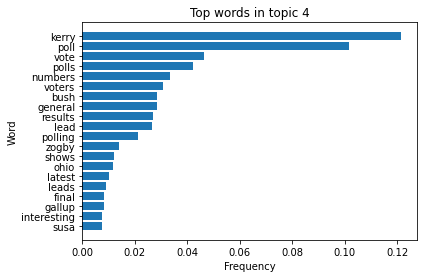

In [ ]:
cutoff = 20
k = 4 - 1
word_counts = swk[:, k]
word_freqs = word_counts / np.sum(word_counts)
top_word_indices = np.argsort(word_freqs)[::-1][:cutoff]
top_frequencies = word_freqs[top_word_indices]
top_words = [word[0] for word in V[top_word_indices, 0]]

print(top_frequencies)

plt.barh(top_words[::-1], top_frequencies[::-1])
plt.title("Top words in topic {}".format(k+1))
plt.xlabel("Frequency")
plt.ylabel("Word")